In [1]:
%matplotlib inline
from matplotlib.pylab import plt

import pandas as pd
import numpy as np

# Let's look at some data with seasonality + trend

In [2]:
air_passengers = pd.read_csv("data/AirPassengers.csv", header = 0, parse_dates = [0], names = ['Month', 'Passengers'], index_col = 0)

### How does it make sense to structure this data?

In [3]:
air_passengers.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
air_passengers = air_passengers.to_period()

In [5]:
air_passengers['1950-06-01':'1950-06-03']

,Passengers
Month,
1950-06,149


### How can we get a sense of this time series?

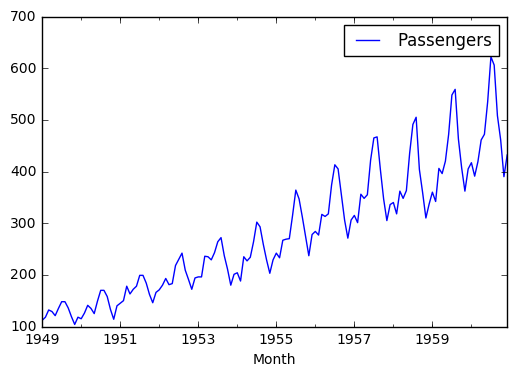

In [6]:
air_passengers.plot()

In [7]:
# first thing we look at for a time series when we want to use common analysis techniques:
# is it stationary: constant mean, constant variance, autocovariance does not depend on time

### Have we got a time independent mean?

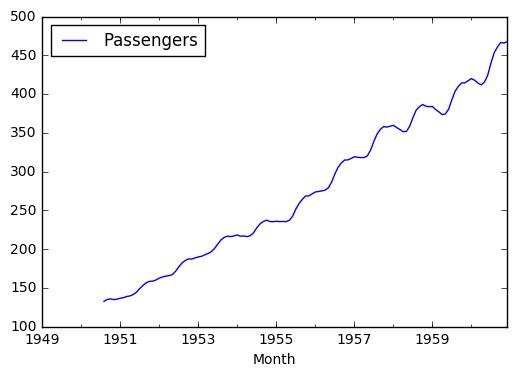

In [8]:
# first test, informally, plot the moving average
air_passengers.rolling(window = 20).mean().plot()

### Have we got a time independent variance?

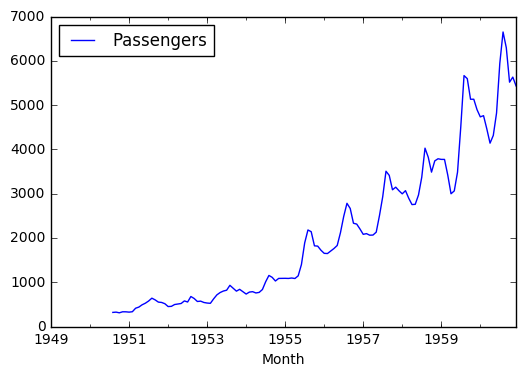

In [9]:
# Can you plot the variance?
air_passengers.rolling(window = 20).var().plot()

### How does sizing your window affect your results?

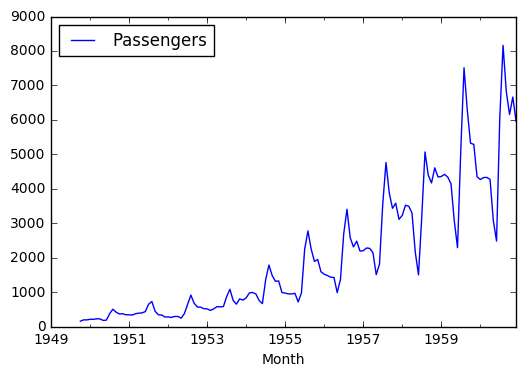

In [10]:
# Can you plot the variance?
air_passengers.rolling(window = 10).var().plot()

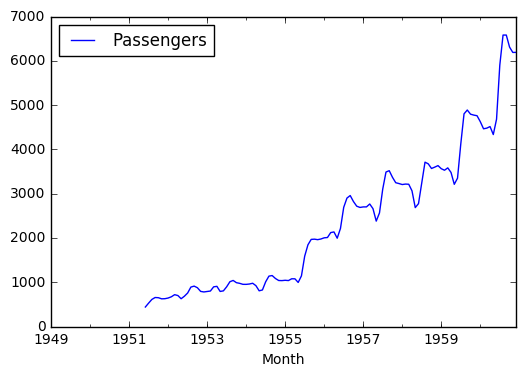

In [11]:
# Can you plot the variance?
air_passengers.rolling(window = 30).var().plot()

### How should you size your window?

In [12]:
# The window size should be 10 because it clearly shows seasonality.

# More formally testing for stationarity

In [13]:
adfuller?

Object `adfuller` not found.


In [14]:

# next more formally apply the Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(air_passengers.Passengers, autolag = 'AIC')

In [15]:
dftest
# What do these numbers mean?

(0.81536887920605383,
 0.99188024343764114,
 13,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.5787700591715979,
  '5%': -2.8840418343195267},
 996.69293083901891)

### Can we write a function to output these #s sensibly?
Hint: check out statsmodels.sourceforge.net/devel/generated/statsmodels.tsa.stattools.adfuller.html

In [16]:
def DFtest(t):    
    adf = t[0]
    pvalue = t[1]
    nlag = t[2]
    nobs = t[3]
    one = t[4]['1%']
    ten = t[4]['10%']
    five = t[4]['5%']
    print('The test statistic is {}'.format(adf))
    print('The p-value is {}'.format(pvalue))
    print('The number of lags used is {}'.format(nlag))
    print('The number of observations is {}'.format(nobs))
    print('The 1% critical value is {}'.format(one))
    print('The 5% critical value is {}'.format(five))
    print('The 10% critical value is {}'.format(ten))

      
DFtest(dftest)

The test statistic is 0.8153688792060538
The p-value is 0.9918802434376411
The number of lags used is 13
The number of observations is 130
The 1% critical value is -3.4816817173418295
The 5% critical value is -2.8840418343195267
The 10% critical value is -2.578770059171598


### Are we stuck not doing any analysis now that our time series is not stationary?

Hint: no.
How can we make it stationary?
Why is it non-stationary (2 reasons)

In [17]:
# The DF test result says we should reject the null hypothesis
# The rolling variance shows clear seasonality and trend

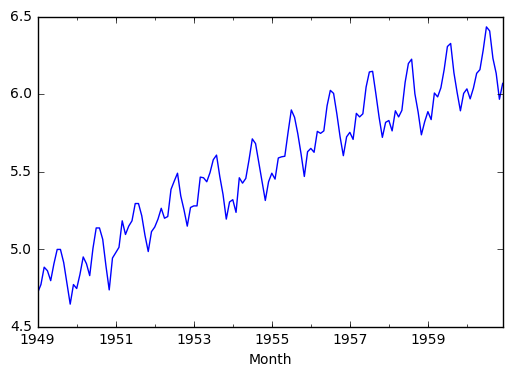

In [18]:
# First let's get rid of the 'trend' contribution to the time series not being stationary
# One method to get rid of a trend is to do a power or log transformation that punishes larger values
# more than smaller values
log_passengers = air_passengers.Passengers.apply(lambda x: np.log(x))
log_passengers.plot()

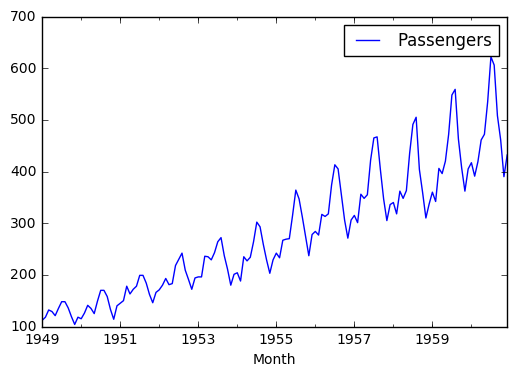

In [19]:
# This reduces the variance in variance as opposed to the original trend
air_passengers.plot()

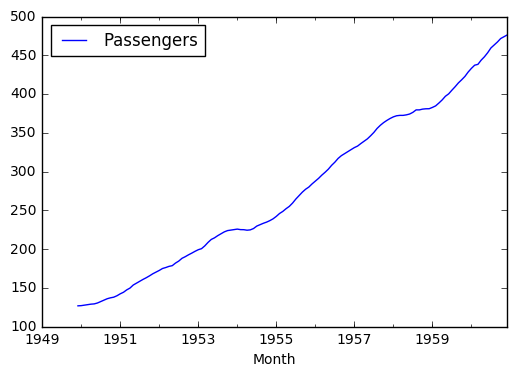

In [20]:
# However there is still a trend we need to remove
# Let's calculate a rolling mean
# Experiment with window size
air_passengers.rolling(window = 12).mean().plot()

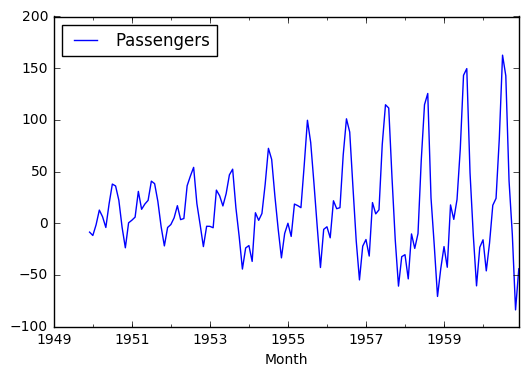

In [21]:
# What if we subtract this rolling mean from the original series?
rolling_mean = air_passengers.rolling(window = 12).mean()
passengers_detrended = air_passengers - rolling_mean
passengers_detrended.plot()

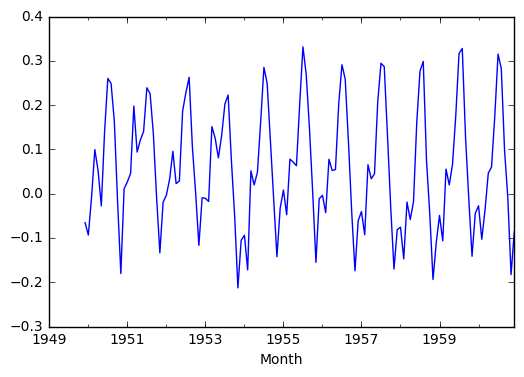

In [22]:
# Exercise: try detrending after taking the log. How does that look?
log_roll = log_passengers.rolling(window = 12).mean()
log_detrend = log_passengers - log_roll
log_detrend.plot()

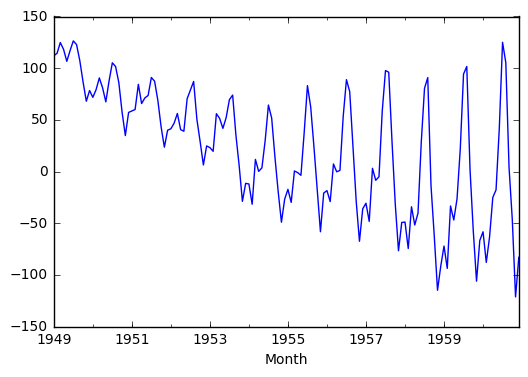

In [23]:
# Now let's use a regression rather than a rolling mean to detrend
from statsmodels.regression.linear_model import OLS
model = OLS(air_passengers.Passengers.values, list(range(len(air_passengers.values))))
result = model.fit()
result.params
fit = pd.Series(result.predict(list(range(len(air_passengers.values)))), index = air_passengers.index)

passengers_detrended = air_passengers.Passengers - fit
passengers_detrended.plot()

In [24]:
# Now let's take a look at seasonality
)

SyntaxError: invalid syntax (<ipython-input-24-a440fa041e3b>, line 2)

In [ ]:
# When might a rolling average work better/worse than a regression?

In [ ]:
# How might we be able to eliminate both trend and seasonality?
# Looking for two answers...

In [ ]:
# One common technique is differencing, let's start with log_passengers
log_passengers_diff = log_passengers - log_passengers.shift()
log_passengers_diff.plot()

In [ ]:
# Let's again test for stationarity with a gut level check.
# And let's write a function to do it since this seems like something we'll have to do a lot

In [ ]:
adfuller(log_passengers)

In [ ]:
log_passengers = log_passengers.to_timestamp()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

log_passengers.interpolate(inplace = True)
decomposition = seasonal_decompose(log_passengers)

In [ ]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [ ]:
(seasonal+trend).plot()

In [ ]:

plt.subplot(411)
plt.plot(log_passengers, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()